# RHALE in depth

In [2]:
import numpy as np
import effector

In [3]:
def generate_samples(N1, N2, sigma_2=1, sigma_3=.01):
    N = N1 + N2
    x1 = np.concatenate((np.array([-0.5]),
                         np.random.uniform(-0.5, 0, size=int(N1 - 2)),
                         np.array([-0.00001]),
                         np.array([0.]),
                         np.random.uniform(0, 0.5, size=int(N2 - 2)),
                         np.array([0.5])))
    x2 = np.random.normal(0, sigma_2, N)
    x3 = x1 + np.random.normal(0, sigma_3, N)
    x = np.stack([x1, x2, x3], -1)
    return x


In [4]:
def predict(x):
    """Evaluate function:
    y = sin(2*pi*x1)*(if x1<0) - 2*sin(2*pi*x1)*(if x3<0) + x1*x2 + x2

    """
    y = np.zeros_like(x[:,0])

    ind = np.logical_and(x[:, 0] >= -2, x[:, 0] < 0)
    y[ind] = np.sin(2 * np.pi * x[ind, 0])

    ind = np.logical_and(x[:, 2] >= -2, x[:, 2] < 0)
    y[ind] -= 2 * np.sin(2 * np.pi * x[ind, 0])

    y += x[:, 0] * x[:, 1] + x[:, 1]
    return y


def predict_grad(x):
    """Evaluate jacobian of:
    y = sin(2*pi*x1)*(if x1<0) - 2*sin(2*pi*x1)*(if x3<0) + x1*x2 + x2

    dy/dx1 = 2*pi*x1*cos(2*pi*x1)*(if x1<0) - 4*pi*x1*cos(2*pi*x1)*(if x3<0) + x2
    dy/dx2 = x1 + 1
    dy/dx3 = 0
    """

    dydx = np.zeros_like(x)

    ind = np.logical_and(x[:, 0] >= -2, x[:, 0] <= 0)
    dydx[ind, 0] = 2 * np.pi * np.cos(2*np.pi * x[ind, 0])

    ind = np.logical_and(x[:, 2] >= -2, x[:, 2] <= 0)
    dydx[ind, 0] += - 2 * 2 * np.pi * np.cos(2*np.pi * x[ind, 0])

    dydx[:, 0] += x[:, 1]

    dydx[:, 1] = x[:, 0] + 1
    return dydx




In [5]:
# main part
np.random.seed(seed=21)
axis_limits = np.array([[-.5, .5], [-5, 5], [-.5, .5]]).T
sigma_2 = 2
sigma_3 = .01
N1 = 50
N2 = 10
x = generate_samples(N1, N2, sigma_2=sigma_2, sigma_3=sigma_3)


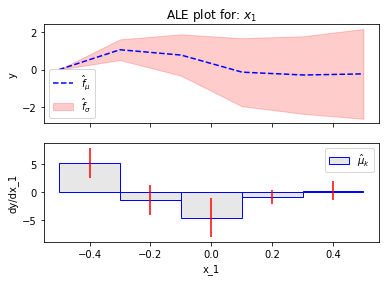

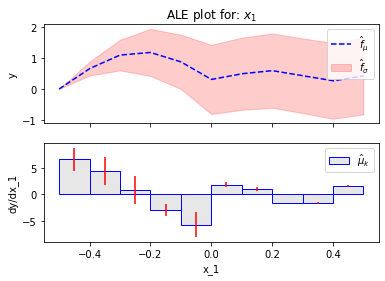

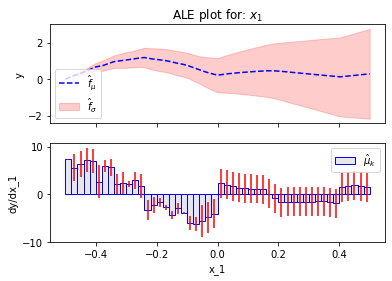

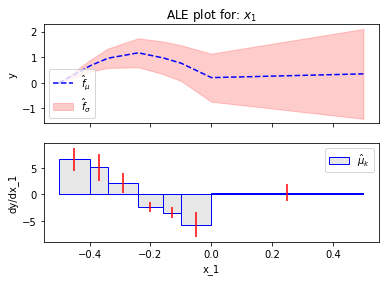

In [15]:
# DALE
for feat in [0]: #, 1, 2]:
    xx = np.linspace(-.5, .5, 100)
    # dale with fixed bins, no err
    dale = effector.RHALE(data=x, model=predict, model_jac=predict_grad, axis_limits=axis_limits)
    binning = effector.binning_methods.Fixed(nof_bins=5, min_points_per_bin=0)
    dale.fit([feat], binning_method=binning)
    dale.plot(feature=feat, uncertainty="std")
#              ground_truth=ale_gt,
#              savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_rhale_5_bins_" + str(feat) + ".pdf"),
#              violin=True)
    # y = dale.eval(feature=0, x=xx, uncertainty=False)
    # simple_ale_plot(xx, y, xlabel="$x_" + str(feat + 1) + "$", title="ALE",
    #                 savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_ale_5_bins_" + str(feat) + ".pdf"))
    # 
    dale = effector.RHALE(data=x, model=predict, model_jac=predict_grad, axis_limits=axis_limits)
    binning = effector.binning_methods.Fixed(nof_bins=10, min_points_per_bin=0)
    dale.fit([feat], binning_method=binning)
    dale.plot(feature=feat, uncertainty="std")
    #           ylim=[-2, 2],
    #           ground_truth=ale_gt,
    #           savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_rhale_10_bins_" + str(feat) + ".pdf"),
    #           violin=True)
    # y = dale.eval(feature=0, x=xx, uncertainty=False)
    # simple_ale_plot(xx, y, xlabel="$x_" + str(feat + 1) + "$", title="ALE",
    #                 savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_ale_10_bins_" + str(feat) + ".pdf"))
    # 
    dale = effector.RHALE(data=x, model=predict, model_jac=predict_grad, axis_limits=axis_limits)
    binning = effector.binning_methods.Fixed(nof_bins=50, min_points_per_bin=0)
    dale.fit([feat], binning_method=binning)
    dale.plot(feature=feat, uncertainty="std")
     # , title)="ALE with heterogeneity - 50 bins",
     #          ylim=[-2, 2],
     #          ground_truth=ale_gt,
     #          savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_rhale_50_bins_" + str(feat) + ".pdf"),
     #          violin=True)
    # y = dale.eval(feature=0, x=xx, uncertainty=False)
    # simple_ale_plot(xx, y, xlabel="$x_" + str(feat + 1) + "$", title="ALE",
    #                 savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_ale_50_bins_" + str(feat) + ".pdf"))
    # 
    # # dale with auto-bins and std
    dale1 = effector.RHALE(data=x, model=predict, model_jac=predict_grad, axis_limits=axis_limits)
    binning = effector.binning_methods.DynamicProgramming(max_nof_bins=50, min_points_per_bin=5, discount=0.1)
    dale1.fit(feat, binning_method=binning)
    dale1.plot(feature=feat, uncertainty="std")
     # , title)="RHALE",
     #           ylim=[-2, 2],
     #           ground_truth=ale_gt,
     #           savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_rhale_" + str(feat) + ".pdf"), violin=True)
    # 
    # # pdp with ICE
    # # pdp_ice = pythia.pdp.PDPwithICE(data=x, model=f, axis_limits=axis_limits)
    # # pdp_ice.fit([feat], normalize="zero_start")
    # # pdp_ice.plot(feature=feat, normalized=True, ylim=[-2, 2],
    # #              title="PDP-ICE",
    # #              ground_truth=ale_gt,
    # #              savefig=os.path.join(dirpath, "exp_" + str(exp_i) + "_pdp_ice_" + str(feat) + ".pdf"))


In [10]:
def simple_ale_plot(x, y, xlabel=None, title=None, savefig=None):
    plt.figure()
    plt.ylim(-2, 2)
    plt.plot(x, ale_gt(x), "r--", label="ground truth")
    plt.plot(x, y, "b--", label="ALE estimation")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("$y$")
    plt.legend()
    if savefig:
        plt.savefig(savefig, bbox_inches="tight")
    plt.show()


def ale_gt(x):
    y = np.zeros_like(x)
    ind = x < 0
    y[ind] = - np.sin(2 * np.pi * x[ind])
    c = 0.31
    return y - c





# if __name__ == "__main__":
#     # args
#     N = 1000
#     sigma_2 = 1
#     sigma_3 = .01
#     exp_i = 1
#     gen_samples_and_plot(N=N, sigma_2=sigma_2, sigma_3=sigma_3, exp_i=exp_i)
#
#     N = 1000
#     sigma_2 = 3
#     sigma_3 = .01
#     exp_i = 2
#     gen_samples_and_plot(N=N, sigma_2=sigma_2, sigma_3=sigma_3, exp_i=exp_i)
